In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata("MNIST original")

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X ,y = mnist["data"],mnist["target"]

In [5]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [6]:
X.shape

(70000, 784)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import matplotlib

In [9]:
some_digit = X[36000]

In [10]:
some_digit_image = some_digit.reshape(28,28)

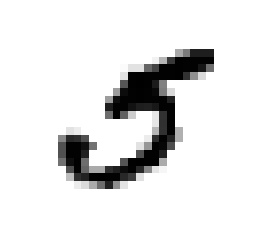

In [11]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation ='nearest')
plt.axis("off")
plt.show()

In [12]:
import numpy as np

In [13]:
shuffled_indices = np.random.permutation(60000)

In [14]:
X_train ,y_train = X_train[shuffled_indices],y_train[shuffled_indices]

In [15]:
y_train_5 = (y_train == 5)

In [16]:
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

In [38]:
sgd_clf = SGDClassifier(random_state = 42)

In [39]:
sgd_clf.fit(X_train,y_train_5)

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [40]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [41]:
from sklearn.model_selection import StratifiedKFold

In [42]:
from sklearn.base import clone

In [43]:
skfolds = StratifiedKFold(n_splits=3,random_state = 42)

In [47]:
for train_indices,test_indices in skfolds.split(X_train,y_train_5):
    sgd_clf_clone = clone(sgd_clf)
    X_train_clone = X_train[train_indices]
    y_train_clone = y_train_5[train_indices]
    X_test_clone = X_train[test_indices]
    y_test_clone = y_train_5[test_indices]
    sgd_clf_clone.fit(X_train_clone,y_train_clone)
    y_pred_clone = sgd_clf_clone.predict(X_test_clone)
    nsum = sum(y_pred_clone == y_test_clone)
    print(nsum/len(y_pred_clone))

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9641


/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96525


/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96435


In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring = "accuracy")

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/li

array([ 0.9641 ,  0.96525,  0.96435])

In [50]:
from sklearn.model_selection import cross_val_predict

In [51]:
y_train_pred = cross_val_predict(sgd_clg,X_train,y_train_5,cv=3)

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/li

In [54]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score

In [53]:
confusion_matrix(y_train_5,y_train_pred)

array([[53681,   898],
       [ 1228,  4193]])

In [55]:
precision_score(y_train_5,y_train_pred)

0.82361029267334507

In [56]:
recall_score(y_train_5,y_train_pred)

0.77347352886921228

In [57]:
f1_score(y_train_5,y_train_pred)

0.79775494672754943

In [58]:
y_scores = sgd_clf.decision_function([some_digit])

In [59]:
y_scores

array([ 96961.68701939])

In [61]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method = "decision_function")

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/li

In [62]:
from sklearn.metrics import precision_recall_curve

In [66]:
 precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [71]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label = "Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

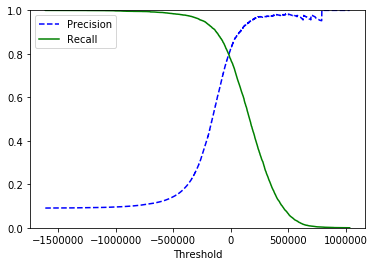

In [72]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

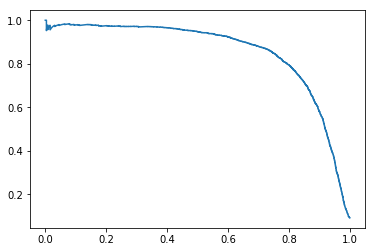

In [73]:
plt.plot(recalls,precisions)

In [74]:
y_train_pred_90 = (y_scores>70000)

In [75]:
precision_score(y_train_5,y_train_pred_90)

0.89491945477075585

In [76]:
recall_score(y_train_5,y_train_pred_90)

0.66611326323556541

In [77]:
from sklearn.metrics import roc_curve

In [78]:
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

In [79]:
def plot_roc_curve(fpr,tpr,label =None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

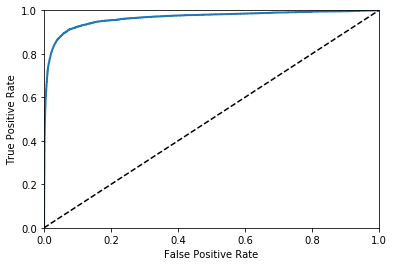

In [80]:
plot_roc_curve(fpr,tpr)
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
roc_auc_score(y_train_5,y_scores)

0.96512642449790387

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
forest_clf = RandomForestClassifier(random_state = 42)

In [85]:
y_prob_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method = "predict_proba")

In [88]:
y_scores_forest = y_prob_forest[:,1]

In [89]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

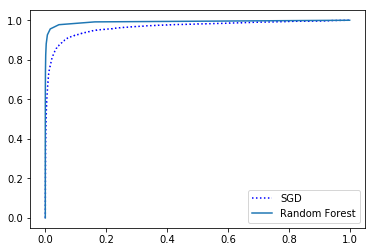

In [90]:
plt.plot(fpr,tpr,"b:",label="SGD")
plt.plot(fpr_forest,tpr_forest,label="Random Forest")
plt.legend(loc ="lower right")
plt.show()

In [91]:
roc_auc_score(y_train_5,y_scores_forest)

0.99221257135064611

In [92]:
y_pred_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3)

In [93]:
precision_score(y_train_5,y_pred_forest)

0.98307692307692307

In [94]:
recall_score(y_train_5,y_pred_forest)

0.82512451577199775

In [1]:
from sklearn.linear_model import SGDClassifier

In [2]:
sgd_clf = SGDClassifier(random_state = 42)

In [19]:
sgd_clf.fit(X_train,y_train)

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit])

array([ 5.])

In [21]:
sgd_clf.decision_function([some_digit])

array([[-210017.75511208, -576650.44757099, -249007.36894925,
        -182993.37088923, -235062.09588149,   94237.36899752,
        -837582.74396093, -398844.69088127, -815880.54994252,
        -780139.84188902]])

In [22]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [24]:
from sklearn.multiclass import OneVsOneClassifier

In [25]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [26]:
ovo_clf.fit(X_train,y_train)

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/li

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/li

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/li

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [27]:
ovo_clf.predict([some_digit])

array([ 5.])

In [28]:
len(ovo_clf.estimators_)

45

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
forest_clf = RandomForestClassifier()

In [32]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
forest_clf.predict([some_digit])

array([ 5.])

In [34]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0.1,  0. ,  0. ,  0.9,  0. ,  0. ,  0. ,  0. ]])

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/li

array([ 0.86372725,  0.8520426 ,  0.85822873])

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [40]:
X_trained = scaler.fit_transform(X_train)

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
cross_val_score(sgd_clf,X_trained,y_train,cv=3,scoring="accuracy")

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/li

array([ 0.90856829,  0.90589529,  0.91383708])

In [42]:
from sklearn.model_selection import cross_val_predict

In [43]:
y_multi_predict = cross_val_predict(sgd_clf,X_trained,y_train,cv=3)

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/li

In [45]:
from sklearn.metrics import confusion_matrix

In [48]:
cnf_matr = confusion_matrix(y_train,y_multi_predict)

In [47]:
import matplotlib.pyplot as plt

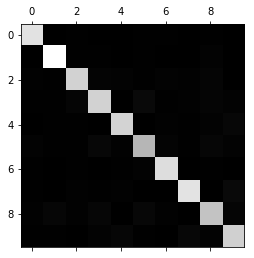

In [49]:
plt.matshow(cnf_matr,cmap=plt.cm.gray)
plt.show()

In [50]:
import numpy as np

In [51]:
row_sums = cnf_matr.sum(axis=1)

In [52]:
cnf_matr = cnf_matr/row_sums

In [53]:
np.fill_diagonal(cnf_matr,0)

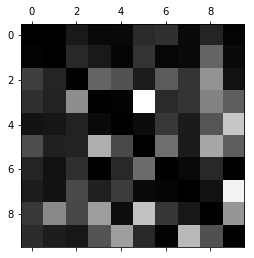

In [54]:
plt.matshow(cnf_matr,cmap = plt.cm.gray)
plt.show()

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn_clf = KNeighborsClassifier()

In [17]:
y_odd = (y_train%2==1)

In [18]:
y_greater = (y_train>=7)

In [19]:
y_final = np.c_[y_odd , y_greater]

In [63]:
knn_clf.fit(X_train,y_final)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [64]:
knn_clf.predict([some_digit])

array([[ True, False]], dtype=bool)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
y_final_pred = cross_val_predict(knn_clf,X_train,y_train,cv=3)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train,y_final_pred,average = "macro")

In [20]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [22]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
clean_digit = knn_clf.predict([X_test_mod[0]])

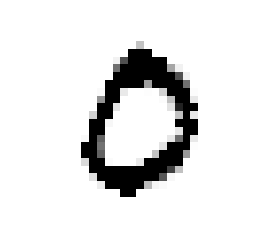

In [25]:

some_digit_image = clean_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_clf = KNeighborsClassifier()

In [20]:
params = {"weights" :['uniform','distance'],"n_neighbors":[5,6,7,8]}

In [22]:
grid_search = GridSearchCV(knn_clf,params,cv = 3,scoring = "accuracy")

In [ ]:
grid_search.fit(X_train,y_train)